<a href="https://colab.research.google.com/github/BanceSt/StageRN/blob/master/catsVsDogs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/dataStage/audio-cats-and-dogs.zip" -d /content/sample_data

Archive:  /content/drive/My Drive/dataStage/audio-cats-and-dogs.zip
  inflating: /content/sample_data/cats_dogs/cat_1.wav  
  inflating: /content/sample_data/cats_dogs/cat_10.wav  
  inflating: /content/sample_data/cats_dogs/cat_100.wav  
  inflating: /content/sample_data/cats_dogs/cat_101.wav  
  inflating: /content/sample_data/cats_dogs/cat_102.wav  
  inflating: /content/sample_data/cats_dogs/cat_103.wav  
  inflating: /content/sample_data/cats_dogs/cat_105.wav  
  inflating: /content/sample_data/cats_dogs/cat_106.wav  
  inflating: /content/sample_data/cats_dogs/cat_107.wav  
  inflating: /content/sample_data/cats_dogs/cat_108.wav  
  inflating: /content/sample_data/cats_dogs/cat_109.wav  
  inflating: /content/sample_data/cats_dogs/cat_11.wav  
  inflating: /content/sample_data/cats_dogs/cat_110.wav  
  inflating: /content/sample_data/cats_dogs/cat_112.wav  
  inflating: /content/sample_data/cats_dogs/cat_113.wav  
  inflating: /content/sample_data/cats_dogs/cat_114.wav  
  inflat

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.io.wavfile as wavfile
import sklearn
import sklearn.metrics
import seaborn as sns
import random
import math
import sklearn.utils
import sklearn.metrics
import matplotlib.pyplot as plt
import glob
import os
import scipy
import scipy.signal
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
import IPython

print(tf.version.VERSION)


1.15.0


In [0]:
WAVE_FOLDER = '/content/sample_data/cats_dogs'
FRAMERATE = 16000
MAX_WAV_SAMPLES = 20*FRAMERATE
DOWNSAMPLING_SCALE = 1

df = pd.read_csv("/content/sample_data/train_test_split.csv")
test_cat = df[['test_cat']].dropna().rename(index=str, columns={"test_cat": "file"}).assign(label=0)
test_dog = df[['test_dog']].dropna().rename(index=str, columns={"test_dog": "file"}).assign(label=1)
train_cat = df[['train_cat']].dropna().rename(index=str, columns={"train_cat": "file"}).assign(label=0)
train_dog = df[['train_dog']].dropna().rename(index=str, columns={"train_dog": "file"}).assign(label=1)

test_df = pd.concat([test_cat, test_dog]).reset_index(drop=True)
train_df = pd.concat([train_cat, train_dog]).reset_index(drop=True)

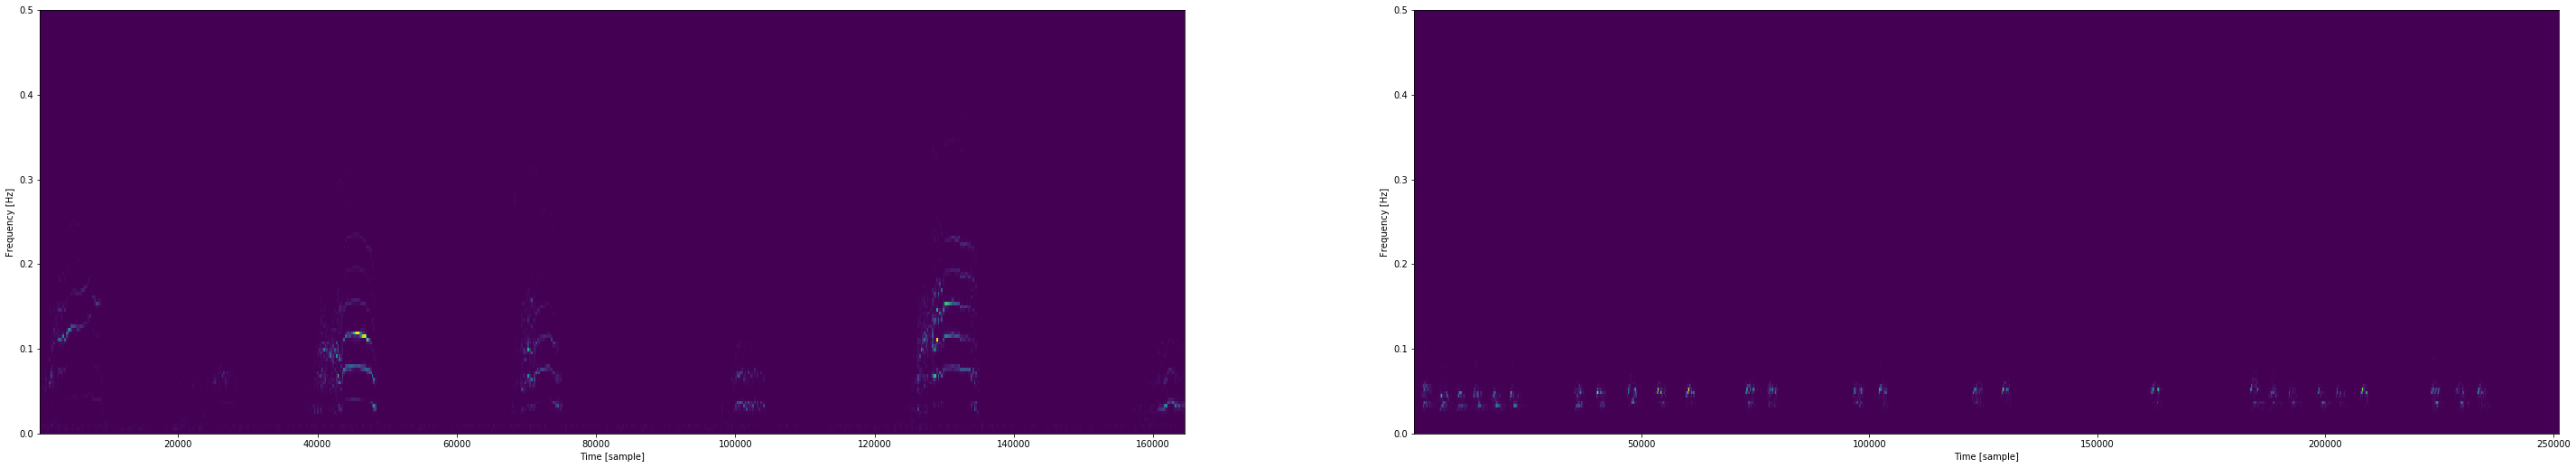

In [0]:
def plot_spectrogram(file):
    x = wavfile.read(file)[1]
    f, t, Sxx = scipy.signal.spectrogram(x)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sample]')


plt.figure(figsize=(50,50))
for i in range(0,2,2):
    plt.subplot(5,2,i+1)
    plot_spectrogram(os.path.join(WAVE_FOLDER, test_cat.iloc[i]['file']))
    plt.subplot(5,2,i+2)
    plot_spectrogram(os.path.join(WAVE_FOLDER, test_dog.iloc[i]['file']))

In [0]:
fig = plt.figure()
def save_all_spectro(base ,path) :
  for i in range(len(base)) :
    img = base.iloc[i]["file"][:-3] + "png"
    plt.axis("off")
    plot_spectrogram(os.path.join("/content/sample_data/cats_dogs", base.iloc[i]["file"]))
    fig.savefig(path + img,bbox_inches='tight',transparent=True, pad_inches=0)
    plt.clf()
"""

plt.axis('off')
plot_spectrogram(os.path.join(WAVE_FOLDER, test_cat.iloc[0]['file']))
fig.savefig("/content/drive/My Drive/dataStage/cat_spec_0.png",bbox_inches='tight',transparent=True, pad_inches=0)
plt.clf()
plt.axis('off')
plot_spectrogram(os.path.join(WAVE_FOLDER, test_dog.iloc[0]['file']))
fig.savefig("/content/drive/My Drive/dataStage/dog_spec_0.png",bbox_inches='tight',transparent=True, pad_inches=0)"""


'\n\nplt.axis(\'off\')\nplot_spectrogram(os.path.join(WAVE_FOLDER, test_cat.iloc[0][\'file\']))\nfig.savefig("/content/drive/My Drive/dataStage/cat_spec_0.png",bbox_inches=\'tight\',transparent=True, pad_inches=0)\nplt.clf()\nplt.axis(\'off\')\nplot_spectrogram(os.path.join(WAVE_FOLDER, test_dog.iloc[0][\'file\']))\nfig.savefig("/content/drive/My Drive/dataStage/dog_spec_0.png",bbox_inches=\'tight\',transparent=True, pad_inches=0)'

<Figure size 432x288 with 0 Axes>

In [0]:

save_all_spectro(train_cat, "/content/sample_data/cats_dogs_spec/train/cats/")
save_all_spectro(train_dog, "/content/sample_data/cats_dogs_spec/train/dogs/")
save_all_spectro(test_cat, "/content/sample_data/cats_dogs_spec/test/cats/")
save_all_spectro(test_dog, "/content/sample_data/cats_dogs_spec/test/dogs/")

<Figure size 432x288 with 0 Axes>

In [0]:
try :
  os.makedirs("/content/sample_data/cats_dogs_spec")
  os.makedirs("/content/sample_data/cats_dogs_spec/test")
  os.makedirs("/content/sample_data/cats_dogs_spec/test/cats")
  os.makedirs("/content/sample_data/cats_dogs_spec/test/dogs")
  os.makedirs("/content/sample_data/cats_dogs_spec/train/cats")
  os.makedirs("/content/sample_data/cats_dogs_spec/train/dogs")
except OSError:
  pass 

In [0]:
help(plt.figure)

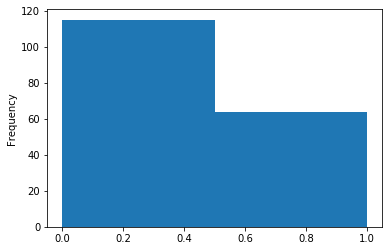

In [0]:
#Histogramme du nombre de cris par type d'animaux (chat, chien)
train_df['label'].plot.hist(bins=2)

In [0]:
#Equilibrage des nombres de cris dans train_files, train_labels
random_oversampler = RandomOverSampler()
idx = np.arange(0, len(train_df)).reshape(-1, 1)
idx_sampled, _ = random_oversampler.fit_sample(idx, train_df['label'])
train_files, train_labels = train_df.iloc[idx_sampled.flatten()]['file'].values, train_df.iloc[idx_sampled.flatten()]['label'].values
train_files, train_labels = sklearn.utils.shuffle(train_files, train_labels)
test_files, test_labels = test_df['file'].values, test_df['label'].values



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


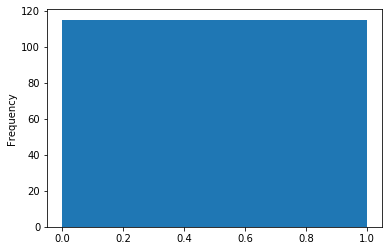

In [0]:
#Historigramme après équilibrage
pd.Series(train_labels).plot.hist(bins=2);

In [0]:
#Génére des batch, et des labels pour l'apprentissage
def fit_generator(train_files, train_labels, wavs_per_batch=20, augments=5):
    while True:
        maxidx = len(train_files)
        for i in range(0, maxidx, wavs_per_batch):
            waves_batch = []
            labels_batch = []
            for j in range(i, min(maxidx, i+wavs_per_batch)):
                file, label = train_files[j], train_labels[j]
                wave_raw = wavfile.read(os.path.join(WAVE_FOLDER, file))[1]
                wave_raw = wave_raw/np.std(wave_raw)
                length = len(wave_raw)
                waves_batch.append(np.pad(wave_raw, pad_width=((0, MAX_WAV_SAMPLES - length)), mode='wrap'))
                labels_batch.append(label)
                for _ in range(augments):
                    wave_rotated = np.roll(wave_raw, random.randint(0, length))
                    while random.choice([True, False]):
                        wave_rotated += np.roll(wave_raw, random.randint(0, length))
                    wave = np.pad(wave_rotated, pad_width=((0, MAX_WAV_SAMPLES - length)), mode='wrap')
                    #wave = scipy.signal.decimate(wave, DOWNSAMPLING_SCALE)
                    waves_batch.append(wave)
                    labels_batch.append(label)
            yield np.array(waves_batch), np.array(labels_batch)



In [0]:
#Génére des batch, et des labels pour la validation
def validate_generator(test_files, test_labels, wavs_per_batch=20):
    while True:
        maxidx = len(test_files)
        for i in range(0, maxidx, wavs_per_batch):
            waves_batch = []
            labels_batch = []
            for j in range(i, min(maxidx, i+wavs_per_batch)):
                file, label = test_files[j], test_labels[j]
                wave_raw = wavfile.read(os.path.join(WAVE_FOLDER, file))[1]
                wave_raw = wave_raw/np.std(wave_raw)
                length = len(wave_raw)
                left = 0
                right = MAX_WAV_SAMPLES - left - length
                wave = np.pad(wave_raw, pad_width=((left, right)), mode='wrap')
                #wave = scipy.signal.decimate(wave, DOWNSAMPLING_SCALE)
                waves_batch.append(wave)
                labels_batch.append(label)
            yield np.array(waves_batch), np.array(labels_batch)

In [0]:
def steps_per_epoch(wavs_per_epoch, wavs_per_batch):
    return int(math.ceil(wavs_per_epoch/wavs_per_batch))

In [0]:
checkpoint_path = "/content/drive/My Drive/savemodel/model"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)



In [0]:
#Création du model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((MAX_WAV_SAMPLES//DOWNSAMPLING_SCALE,1), input_shape=(MAX_WAV_SAMPLES//DOWNSAMPLING_SCALE,)))
for i in range(14):
    model.add(tf.keras.layers.Conv1D(32, kernel_size=5, 
                                     padding='same',
                                     activation='relu',
                                     kernel_initializer=tf.keras.initializers.Orthogonal(),
                                    ))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=3, strides=2))
    model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

In [0]:
#Apprentissage
WAVS_PER_BATCH = 3
AUGMENTS = 10
EPOCHS=15
model.fit_generator(fit_generator(train_files, train_labels, WAVS_PER_BATCH, AUGMENTS),
                    steps_per_epoch=steps_per_epoch(len(train_files), WAVS_PER_BATCH),
                    epochs = EPOCHS,
                    validation_data=validate_generator(test_files, test_labels, WAVS_PER_BATCH),
                    validation_steps=steps_per_epoch(len(test_files), WAVS_PER_BATCH),
                    callbacks = [cp_callback],
                    verbose=2)

Epoch 1/15
Epoch 1/15

Epoch 00001: saving model to /content/drive/My Drive/savemodel/model
77/77 - 39s - loss: 0.7229 - acc: 0.6719 - val_loss: 0.7683 - val_acc: 0.5000
Epoch 2/15
Epoch 1/15

Epoch 00002: saving model to /content/drive/My Drive/savemodel/model
77/77 - 30s - loss: 0.6495 - acc: 0.6957 - val_loss: 0.7792 - val_acc: 0.5000
Epoch 3/15
Epoch 1/15

Epoch 00003: saving model to /content/drive/My Drive/savemodel/model
77/77 - 30s - loss: 0.5669 - acc: 0.7403 - val_loss: 0.5865 - val_acc: 0.7041
Epoch 4/15
Epoch 1/15

Epoch 00004: saving model to /content/drive/My Drive/savemodel/model
77/77 - 30s - loss: 0.5416 - acc: 0.7609 - val_loss: 0.5059 - val_acc: 0.7755
Epoch 5/15
Epoch 1/15

Epoch 00005: saving model to /content/drive/My Drive/savemodel/model
77/77 - 30s - loss: 0.4977 - acc: 0.7684 - val_loss: 0.3281 - val_acc: 0.8673
Epoch 6/15
Epoch 1/15

Epoch 00006: saving model to /content/drive/My Drive/savemodel/model
77/77 - 30s - loss: 0.4734 - acc: 0.7996 - val_loss: 0.264

0.8979591836734694


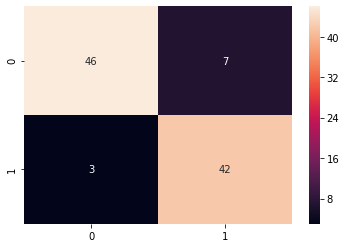

In [0]:
#Matrice de confusion
predicted_probs = model.predict_generator(
    validate_generator(test_files, test_labels, WAVS_PER_BATCH),
    steps=steps_per_epoch(len(test_files), WAVS_PER_BATCH))
predicted_classes = np.argmax(predicted_probs, axis=1)
print(sklearn.metrics.accuracy_score(predicted_classes, test_labels))
sns.heatmap(sklearn.metrics.confusion_matrix(predicted_classes, test_labels), annot=True);

In [0]:

# test sur un wav particulier
aFile = "/content/sample_data/cats_dogs/test/cats/cat_110.wav"

wave_raw = wavfile.read(aFile)[1]
wave_raw = wave_raw/np.std(wave_raw)
length = len(wave_raw)
left = 0
right = MAX_WAV_SAMPLES - left - length
wave = np.pad(wave_raw, pad_width=((left, right)), mode='wrap')



In [0]:
print(type(wave))

print(wave.shape)

<class 'numpy.ndarray'>
(320000,)


In [0]:
wave = wave.reshape( (1,wave.size) )

resu = model.predict(wave)
print(resu)

[[0.77998054 0.2200195 ]]


In [0]:
# test sur un wav particulier
files = ["/content/sample_data/cats_dogs/test/cats/cat_110.wav","/content/sample_data/cats_dogs/train/dog/dog_barking_10.wav"]

waves = []
for aFile in files:
  
  wave_raw = wavfile.read(aFile)[1]
  wave_raw = wave_raw/np.std(wave_raw)
  length = len(wave_raw)
  left = 0
  right = MAX_WAV_SAMPLES - left - length
  wave = np.pad(wave_raw, pad_width=((left, right)), mode='wrap')
  wave = wave.reshape( (1,wave.size) )
  print(wave.shape)

  if len(waves) == 0 :
    waves = wave
  else :
    waves = np.concatenate((waves, wave), axis = 0)


(1, 320000)
(1, 320000)


In [0]:
print(waves.shape)

(2, 320000)


In [0]:
resu = model.predict(waves)
print(resu)

[[0.7799804  0.22001958]
 [0.00720245 0.99279755]]


In [0]:

#model1.load_weights(checkpoint_path)

AssertionError: ignored